<a href="https://colab.research.google.com/github/najnin26/Quantum-Machine-Learning/blob/main/QNN/QNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install qiskit

In [16]:
!pip install qiskit-machine-learning

In [17]:
!pip install pylatexenc

- **EstimatorQNN**: It's like a high-tech tool with extra features, perfect for handling complex tasks. You can fine-tune it more and it works great with detailed, customizable measurements.

- **SimplerQNN (like CircuitQNN)**: Think of it as the beginner-friendly version. Easier to set up and use, ideal for straightforward tasks and for those just getting started.

Choose based on whether you need a Ferrari or a reliable sedan for your quantum task! 🚗

# **2. How to Instantiate QNNs**

# 2.1. EstimatorQNN

In [18]:
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed=42

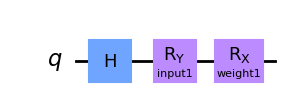

In [19]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

In [20]:
from qiskit.quantum_info import SparsePauliOp
observable1=SparsePauliOp.from_list([('Y'*qc1.num_qubits,1)])

In [21]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn=EstimatorQNN(
    circuit=qc1,
    input_params=[params1[0]],
    weight_params=[params1[1]],
    observables=observable1
)
estimator_qnn

In [22]:
print(estimator_qnn.circuit)
print(estimator_qnn.input_params)
print(estimator_qnn.weight_params)
print(estimator_qnn.observables)

   ┌───┐┌────────────┐┌─────────────┐
q: ┤ H ├┤ Ry(input1) ├┤ Rx(weight1) ├
   └───┘└────────────┘└─────────────┘
[Parameter(input1)]
[Parameter(weight1)]
(SparsePauliOp(['Y'],
              coeffs=[1.+0.j]),)


# 2.2. SamplerQNN

input parameters : ['input[0]', 'input[1]']
weight parameters : ['weights[0]', 'weights[1]', 'weights[2]', 'weights[3]']


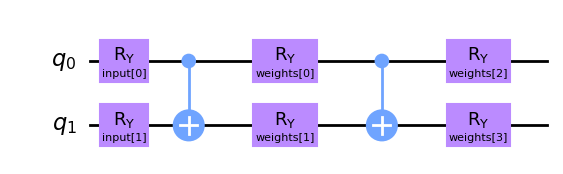

In [23]:
from qiskit.circuit import ParameterVector

input2=ParameterVector("input",2)
weight2=ParameterVector("weights",4)
print(f"input parameters : {[str(item) for item in input2.params]}")
print(f"weight parameters : {[str(item) for item in weight2.params]}")

qc2=QuantumCircuit(2)
qc2.ry(input2[0],0)
qc2.ry(input2[1],1)
qc2.cx(0,1)
qc2.ry(weight2[0],0)
qc2.ry(weight2[1],1)
qc2.cx(0,1)
qc2.ry(weight2[2],0)
qc2.ry(weight2[3],1)

qc2.draw('mpl',style='clifford')

In [25]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=input2, weight_params=weight2)
sampler_qnn

In [27]:
print(sampler_qnn.circuit)
print(sampler_qnn.input_params)
print(sampler_qnn.weight_params)

     ┌──────────────┐     ┌────────────────┐     ┌────────────────┐
q_0: ┤ Ry(input[0]) ├──■──┤ Ry(weights[0]) ├──■──┤ Ry(weights[2]) ├
     ├──────────────┤┌─┴─┐├────────────────┤┌─┴─┐├────────────────┤
q_1: ┤ Ry(input[1]) ├┤ X ├┤ Ry(weights[1]) ├┤ X ├┤ Ry(weights[3]) ├
     └──────────────┘└───┘└────────────────┘└───┘└────────────────┘
[ParameterVectorElement(input[0]), ParameterVectorElement(input[1])]
[ParameterVectorElement(weights[0]), ParameterVectorElement(weights[1]), ParameterVectorElement(weights[2]), ParameterVectorElement(weights[3])]


# **3. How to Run a Forward Pass**

we will specify random sets of input and weights of the right dimension:

In [28]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [29]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 1 
Input: [0.77395605]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.43887844]


In [30]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

In [31]:
print(
    f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input}"
)
print(
    f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \nWeights: {sampler_qnn_weights}"
)

Number of input features for SamplerQNN: 2 
Input: [0.85859792 0.69736803]
Number of trainable weights for SamplerQNN: 4 
Weights: [0.09417735 0.97562235 0.7611397  0.78606431]


# 3.2. Non-batched Forward Pass
- **Non-Batched Forward Pass**: This involves processing one data point (or one set of inputs) at a time through the quantum circuit. Each input is individually fed into the circuit, and the corresponding output is generated. This method is straightforward but can be inefficient for large datasets because it doesn't take advantage of parallel processing

In [32]:
estimator_qnn_forward=estimator_qnn.forward(estimator_qnn_input,estimator_qnn_weights)
print(
        f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.2970094]]. 
Shape: (1, 1)


In [33]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (1, 4)


# 3.3. Batched Forward Pass
- **Batched Forward Pass**: This involves processing multiple data points simultaneously through the quantum circuit. By grouping several inputs together into a batch, the circuit can perform operations on all of them at once, leveraging parallelism. This can significantly speed up the computation, especially when dealing with large datasets.

In [34]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input,estimator_qnn_input],estimator_qnn_weights
)
print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.2970094]
 [0.2970094]].  
Shape: (2, 1)


In [35]:
sampler_qnn_forward_batched = sampler_qnn.forward(
    [sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights
)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}"
)

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]
 [0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (2, 4)


# **4. How to Run a Backward Pass**

# 4.1. Backward Pass without Input Gradients
- **Backward Pass Without Input Gradients:** This means updating the weights of your neural network during training without considering how changes in the input affect the loss. It's a quicker, more straightforward way, often used when you're only interested in how the weights should be adjusted.



In [39]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [37]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: None.  
Shape: None
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


# 4.2. Backward Pass with Input Gradients
- **Backward Pass With Input Gradients**: Here, you also take into account how changes in the input impact the loss. This makes the training more precise and nuanced because you're considering the full effect of both input changes and weight adjustments on the outcome.

In [40]:
estimator_qnn.input_gradients = True
sampler_qnn.input_gradients = True

In [41]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.3038852]]].  
Shape: (1, 1, 1)
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [42]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: [[[-0.05844702 -0.10621091]
  [ 0.38798796 -0.19544083]
  [-0.34561132  0.09459601]
  [ 0.01607038  0.20705573]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


# **5. Advanced Functionality**

# 5.1. EstimatorQNN with Multiple Observables
- **EstimatorQNN with Multiple Observables:** Think of it as an advanced measurement tool. You can set up a QNN to evaluate multiple aspects (observables) at once. This is useful when you need detailed insights from different angles, all in one go.

In [43]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)

In [44]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")


Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


## 5.2. SamplerQNN with custom interpret
- **SamplerQNN with Custom Interpret:** This one’s more about flexibility. It allows you to define how the outputs (samples) should be interpreted. You can create custom rules or methods to make sense of the results, tailored to your specific needs.

In [46]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=input2,
    weight_params=weight2,
    interpret=parity,
    output_shape=output_shape,
)

In [47]:
sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")

Forward output for SamplerQNN1: (1, 4)
Forward output for SamplerQNN2: (1, 2)
Backward output for SamplerQNN1: (1, 4, 4)
Backward output for SamplerQNN2: (1, 2, 4)
